In [1]:
!pip install hvplot
!pip install -U bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 59.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.14.4 requires bokeh<2.5.0,>=2.4.0, but you have bokeh 3.1.1 which is incompatible.


In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib as plt

In [3]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
spark_version = 'spark-3.4.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,354 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,256 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 http://secu

In [4]:
from pyspark import SparkContext, SparkConf
#Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Final Project Analysis").getOrCreate()

In [5]:
from pyspark import SparkFiles
# Read in data from S3 Buckets
url20 = "https://cps-final-project-bucket.s3.us-east-2.amazonaws.com/metrics_collenrollpersist_schoollevel_20222_CLEAN_3+(2).csv"
spark.sparkContext.addFile(url20)
persist_3_df = spark.read.csv(SparkFiles.get("metrics_collenrollpersist_schoollevel_20222_CLEAN_3+(2).csv"), sep=",", header=True)

persist_3_df.show()

+---------+----------------------+------+-----------------------+-------------------------+----------------------------+-----------------------------------------+-----------------------------+-----------------------+-------------------------+----------------------------+-----------------------------------------+-----------------------------+-----------------------+-------------------------+----------------------------+-----------------------------------------+-----------------------------+-----------------------+-------------------------+----------------------------+-----------------------------------------+-----------------------------+-----------------------+-------------------------+----------------------------+-----------------------------------------+-----------------------------+
|School_ID|Annualized School Name|status|Class of 2019 Graduates|Class of 2019 Enrollments|Class of 2019 Enrollment Pct|Class of 2019 # of Enrollments Persisting|Class of 2019 Persistence Pct|Class of 20

In [6]:
persist_3_df = persist_3_df.toPandas()
persist_3_df.head()

,School_ID,Annualized School Name,status,Class of 2019 Graduates,Class of 2019 Enrollments,Class of 2019 Enrollment Pct,Class of 2019 # of Enrollments Persisting,Class of 2019 Persistence Pct,Class of 2018 Graduates,Class of 2018 Enrollments,...,Class of 2016 Graduates,Class of 2016 Enrollments,Class of 2016 Enrollment Pct,Class of 2016 # of Enrollments Persisting,Class of 2016 Persistence Pct,Class of 2015 Graduates,Class of 2015 Enrollments,Class of 2015 Enrollment Pct,Class of 2015 # of Enrollments Persisting,Class of 2015 Persistence Pct
0,400013,ASPIRA - EARLY COLLEGE HS,None,75,30,40,18,60,83,49,...,103,57,55.3,37,64.9,78,23,29.5,13,56.5
1,400022,CHIARTS HS,None,133,114,85.7,97,85.1,146,117,...,112,90,80.4,79,87.8,113,90,79.6,80,88.9
2,400032,CICS - ELLISON HS,None,101,62,61.4,31,50,72,47,...,89,45,50.6,28,62.2,98,63,64.3,42,66.7
3,400033,CICS - LONGWOOD,None,87,44,50.6,30,68.2,107,52,...,87,39,44.8,28,71.8,77,50,64.9,28,56
4,400034,CICS - NORTHTOWN HS,None,207,151,72.9,114,75.5,178,145,...,176,132,75,101,76.5,167,128,76.6,108,84.4


In [7]:
persist_3_df.rename(columns={"School_ID": "School ID"}, inplace=True)
persist_3_df

,School ID,Annualized School Name,status,Class of 2019 Graduates,Class of 2019 Enrollments,Class of 2019 Enrollment Pct,Class of 2019 # of Enrollments Persisting,Class of 2019 Persistence Pct,Class of 2018 Graduates,Class of 2018 Enrollments,...,Class of 2016 Graduates,Class of 2016 Enrollments,Class of 2016 Enrollment Pct,Class of 2016 # of Enrollments Persisting,Class of 2016 Persistence Pct,Class of 2015 Graduates,Class of 2015 Enrollments,Class of 2015 Enrollment Pct,Class of 2015 # of Enrollments Persisting,Class of 2015 Persistence Pct
0,400013,ASPIRA - EARLY COLLEGE HS,None,75,30,40,18,60,83,49,...,103,57,55.3,37,64.9,78,23,29.5,13,56.5
1,400022,CHIARTS HS,None,133,114,85.7,97,85.1,146,117,...,112,90,80.4,79,87.8,113,90,79.6,80,88.9
2,400032,CICS - ELLISON HS,None,101,62,61.4,31,50,72,47,...,89,45,50.6,28,62.2,98,63,64.3,42,66.7
3,400033,CICS - LONGWOOD,None,87,44,50.6,30,68.2,107,52,...,87,39,44.8,28,71.8,77,50,64.9,28,56
4,400034,CICS - NORTHTOWN HS,None,207,151,72.9,114,75.5,178,145,...,176,132,75,101,76.5,167,128,76.6,108,84.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,610570,OMBUDSMAN - SOUTH HS,None,88,16,18.2,5,31.3,95,21,...,89,21,23.6,9,42.9,39,5,12.8,None,None
167,610571,OMBUDSMAN - WEST HS,None,54,16,29.6,11,68.8,44,6,...,70,11,15.7,3,27.3,54,4,7.4,None,None
168,610587,DYETT ARTS HS,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
169,610593,OMBUDSMAN - ROSELAND HS,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
persist_3_df = persist_3_df.set_index(['School ID'])
persist_3_df

,Annualized School Name,status,Class of 2019 Graduates,Class of 2019 Enrollments,Class of 2019 Enrollment Pct,Class of 2019 # of Enrollments Persisting,Class of 2019 Persistence Pct,Class of 2018 Graduates,Class of 2018 Enrollments,Class of 2018 Enrollment Pct,...,Class of 2016 Graduates,Class of 2016 Enrollments,Class of 2016 Enrollment Pct,Class of 2016 # of Enrollments Persisting,Class of 2016 Persistence Pct,Class of 2015 Graduates,Class of 2015 Enrollments,Class of 2015 Enrollment Pct,Class of 2015 # of Enrollments Persisting,Class of 2015 Persistence Pct
School ID,,,,,,,,,,,,,,,,,,,,,
400013,ASPIRA - EARLY COLLEGE HS,None,75,30,40,18,60,83,49,59,...,103,57,55.3,37,64.9,78,23,29.5,13,56.5
400022,CHIARTS HS,None,133,114,85.7,97,85.1,146,117,80.1,...,112,90,80.4,79,87.8,113,90,79.6,80,88.9
400032,CICS - ELLISON HS,None,101,62,61.4,31,50,72,47,65.3,...,89,45,50.6,28,62.2,98,63,64.3,42,66.7
400033,CICS - LONGWOOD,None,87,44,50.6,30,68.2,107,52,48.6,...,87,39,44.8,28,71.8,77,50,64.9,28,56
400034,CICS - NORTHTOWN HS,None,207,151,72.9,114,75.5,178,145,81.5,...,176,132,75,101,76.5,167,128,76.6,108,84.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610570,OMBUDSMAN - SOUTH HS,None,88,16,18.2,5,31.3,95,21,22.1,...,89,21,23.6,9,42.9,39,5,12.8,None,None
610571,OMBUDSMAN - WEST HS,None,54,16,29.6,11,68.8,44,6,13.6,...,70,11,15.7,3,27.3,54,4,7.4,None,None
610587,DYETT ARTS HS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [9]:
url21 = "https://cps-final-project-bucket.s3.us-east-2.amazonaws.com/metrics_cohortgraduationdropoutadjusted_schoollevel_2011to2019.csv"
spark.sparkContext.addFile(url21)
grad_and_dropout_df = spark.read.csv(SparkFiles.get("metrics_cohortgraduationdropoutadjusted_schoollevel_2011to2019.csv"), sep=",", header=True)

In [10]:
grad_and_dropout_df = grad_and_dropout_df.toPandas()
grad_and_dropout_df.head()

,School ID,School Name,Status as of 2019,2011 Grad. %,2012 Grad. %,2013 Grad. %,2014 Grad. %,2015 Grad. %,2016 Grad. %,2017 Grad. %,2018 Grad. %,2019 Grad. %
0,400121,ACERO - DE LA CRUZ,None,,,,,,,,78.1,79.5
1,400085,ACERO - GARCIA HS,None,,,75.5,85.1,89.5,84.5,89.2,86.3,87.3
2,400149,ACERO - SOTO HS,None,,,,,,,,83.9,71.4
3,610513,AIR FORCE HS,None,,,,70.2,84.0,86.1,86.7,81.9,83.7
4,610524,ALCOTT HS,None,,,,86.3,77.7,87.1,81.3,84.9,92.1


In [11]:
url22 = "https://cps-final-project-bucket.s3.us-east-2.amazonaws.com/metrics_cohortgraduationdropoutadjusted_schoollevel_2011to2019+(1).csv"
spark.sparkContext.addFile(url22)
grad_and_dropout_2_df = spark.read.csv(SparkFiles.get("metrics_cohortgraduationdropoutadjusted_schoollevel_2011to2019+(1).csv"), sep=",", header=True)

grad_and_dropout_2_df.show()

+---------+--------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|School ID|         School Name|Status as of 2019|2011 Grad. %|2012 Grad. %|2013 Grad. %|2014 Grad. %|2015 Grad. %|2016 Grad. %|2017 Grad. %|2018 Grad. %|2019 Grad. %|
+---------+--------------------+-----------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|   400121|  ACERO - DE LA CRUZ|             null|        78.1|        79.5|        null|        null|        null|        null|        null|        null|        null|
|   400085|   ACERO - GARCIA HS|             null|        75.5|        85.1|        89.5|        84.5|        89.2|        86.3|        87.3|        null|        null|
|   400149|     ACERO - SOTO HS|             null|        83.9|        71.4|        null|        null|        null|        null|        null|        null|      

In [12]:
grad_and_dropout_2_df = grad_and_dropout_2_df.toPandas()
grad_and_dropout_2_df.head()

,School ID,School Name,Status as of 2019,2011 Grad. %,2012 Grad. %,2013 Grad. %,2014 Grad. %,2015 Grad. %,2016 Grad. %,2017 Grad. %,2018 Grad. %,2019 Grad. %
0,400121,ACERO - DE LA CRUZ,None,78.1,79.5,None,None,None,None,None,None,None
1,400085,ACERO - GARCIA HS,None,75.5,85.1,89.5,84.5,89.2,86.3,87.3,None,None
2,400149,ACERO - SOTO HS,None,83.9,71.4,None,None,None,None,None,None,None
3,610513,AIR FORCE HS,None,70.2,84.0,86.1,86.7,81.9,83.7,None,None,None
4,610524,ALCOTT HS,None,86.3,77.7,87.1,81.3,84.9,92.1,None,None,None


In [13]:
url10 = "https://cps-final-project-bucket.s3.us-east-2.amazonaws.com/metrics_attendance_clean3.csv"
spark.sparkContext.addFile(url10)
attendance2_df = spark.read.csv(SparkFiles.get("metrics_attendance_clean3.csv"), sep=",", header=True)

In [14]:
attendance2_df = attendance2_df.toPandas()
attendance2_df.head()

,School ID,School Name,Network,Group,Grade,2015,2016,2017,2018,2019
0,609771,ABBOTT,None,Grade,8,None,None,None,None,None
1,400010,ACE TECH HS,None,Grade,8,None,None,None,None,None
2,400153,ACERO - BRIGHTON PARK,Charter,Grade,8,95.3,93.6,95.3,95.8,95.3
3,400101,ACERO - CISNEROS,Charter,Grade,8,96.9,96.7,96.6,95.7,96.2
4,400120,ACERO - CLEMENTE,Charter,Grade,8,95.3,94.8,95.0,95.6,95.6


In [15]:
url6 = "https://cps-final-project-bucket.s3.us-east-2.amazonaws.com/metrics_fot_schoollevel_2022-1.csv"
spark.sparkContext.addFile(url6)
fot_df = spark.read.csv(SparkFiles.get("metrics_fot_schoollevel_2022-1.csv"), sep=",", header=True)

In [16]:
fot_df = fot_df.toPandas()
fot_df.head()

,School ID,School Name,SY 2019 On-Track Rate,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen
0,610513,AIR FORCE HS,88.9,54,90.6,32,87.4,95,80.2,101,90.4,104
1,610524,ALCOTT HS,90.0,100,90.7,86,77.6,98,85.3,95,86.7,83
2,609695,AMUNDSEN HS,92.4,369,92.4,327,90.0,309,94.4,322,89.6,278
3,400018,AUSTIN BUS & ENTRP HS,None,None,None,None,None,None,71.4,14,81.6,38
4,610518,AUSTIN CCA HS,87.9,58,76.9,52,70.0,50,55.6,18,68.3,41


In [17]:
fot_df = fot_df.set_index(['School ID'])
fot_df

,School Name,SY 2019 On-Track Rate,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen
School ID,,,,,,,,,,,
610513,AIR FORCE HS,88.9,54,90.6,32,87.4,95,80.2,101,90.4,104
610524,ALCOTT HS,90.0,100,90.7,86,77.6,98,85.3,95,86.7,83
609695,AMUNDSEN HS,92.4,369,92.4,327,90.0,309,94.4,322,89.6,278
400018,AUSTIN BUS & ENTRP HS,None,None,None,None,None,None,71.4,14,81.6,38
610518,AUSTIN CCA HS,87.9,58,76.9,52,70.0,50,55.6,18,68.3,41
...,...,...,...,...,...,...,...,...,...,...,...
609740,WELLS HS,88.9,90,87.1,124,90.9,88,85.3,68,76.4,144
609693,WESTINGHOUSE HS,97.7,299,98.2,332,96.4,304,95.0,302,94.5,292
610380,WILLIAMS HS,70.0,30,80.9,68,85.4,48,83.1,71,81.1,90


In [18]:
grad_rate_merge_fot_df = pd.merge(grad_and_dropout_2_df, fot_df, on=['School ID'])
grad_rate_merge_fot_df.head()

,School ID,School Name_x,Status as of 2019,2011 Grad. %,2012 Grad. %,2013 Grad. %,2014 Grad. %,2015 Grad. %,2016 Grad. %,2017 Grad. %,...,SY 2019 On-Track Rate,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen
0,610513,AIR FORCE HS,None,70.2,84.0,86.1,86.7,81.9,83.7,None,...,88.9,54,90.6,32,87.4,95,80.2,101,90.4,104
1,610524,ALCOTT HS,None,86.3,77.7,87.1,81.3,84.9,92.1,None,...,90.0,100,90.7,86,77.6,98,85.3,95,86.7,83
2,609695,AMUNDSEN HS,None,63.8,64.7,77.1,74.7,75.8,82.8,76.0,...,92.4,369,92.4,327,90.0,309,94.4,322,89.6,278
3,610518,AUSTIN CCA HS,None,67.8,55.4,70.9,70.9,77.3,77.6,64.7,...,87.9,58,76.9,52,70.0,50,55.6,18,68.3,41
4,610563,BACK OF THE YARDS HS,None,91.8,97.3,None,None,None,None,None,...,97.5,276,100.0,274,99.6,275,100.0,261,100.0,275


In [19]:
grad_rate_merge_fot_df = grad_rate_merge_fot_df[grad_rate_merge_fot_df['2016 Grad. %'].notnull()]
grad_rate_merge_fot_df

,School ID,School Name_x,Status as of 2019,2011 Grad. %,2012 Grad. %,2013 Grad. %,2014 Grad. %,2015 Grad. %,2016 Grad. %,2017 Grad. %,...,SY 2019 On-Track Rate,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen
0,610513,AIR FORCE HS,None,70.2,84.0,86.1,86.7,81.9,83.7,None,...,88.9,54,90.6,32,87.4,95,80.2,101,90.4,104
1,610524,ALCOTT HS,None,86.3,77.7,87.1,81.3,84.9,92.1,None,...,90.0,100,90.7,86,77.6,98,85.3,95,86.7,83
2,609695,AMUNDSEN HS,None,63.8,64.7,77.1,74.7,75.8,82.8,76.0,...,92.4,369,92.4,327,90.0,309,94.4,322,89.6,278
3,610518,AUSTIN CCA HS,None,67.8,55.4,70.9,70.9,77.3,77.6,64.7,...,87.9,58,76.9,52,70.0,50,55.6,18,68.3,41
5,609698,BOGAN HS,None,52.0,53.6,60.3,66.8,74.3,75.7,71.4,...,86.5,222,95.2,189,97.2,177,92.9,198,89.4,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,610392,WORLD LANGUAGE HS,None,67.8,59.8,82.5,69.8,82.3,77.9,85.0,...,84.4,96,93.5,93,93.8,96,86.6,82,84.0,75
88,609755,YOUNG HS,None,93.9,91.1,94.4,93.3,91.4,96.2,96.1,...,98.6,498,98.4,516,98.3,475,97.9,433,99.1,448
89,400018,AUSTIN BUS & ENTRP HS,Closed,65.6,53.8,60.9,50.0,63.5,76.5,71.0,...,None,None,None,None,None,None,71.4,14,81.6,38
90,610501,AUSTIN POLY HS,Closed,63.1,57.1,60.3,50.7,60.9,47.1,55.6,...,None,None,None,None,None,None,66.7,21,80.6,31


In [20]:
persist_merge_fot_df = pd.merge(persist_3_df, fot_df, on=['School ID'])
persist_merge_fot_df.head()

,Annualized School Name,status,Class of 2019 Graduates,Class of 2019 Enrollments,Class of 2019 Enrollment Pct,Class of 2019 # of Enrollments Persisting,Class of 2019 Persistence Pct,Class of 2018 Graduates,Class of 2018 Enrollments,Class of 2018 Enrollment Pct,...,SY 2019 On-Track Rate,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen
School ID,,,,,,,,,,,,,,,,,,,,,
609674,CHICAGO VOCATIONAL HS,None,200,97,48.5,42,43.3,210,80,38.1,...,91.5,260,88.8,206,89.7,174,92.0,224,85.2,243
609676,DUNBAR HS,None,76,53,69.7,29,54.7,99,57,57.6,...,90.3,62,81.4,86,78.4,102,75.5,147,62.4,186
609678,JONES HS,None,435,383,88,352,91.9,463,400,86.4,...,98.0,509,99.6,452,99.1,423,99.1,428,99.0,482
609679,PROSSER HS,None,298,211,70.8,133,63,293,224,76.5,...,82.5,275,92.4,397,95.8,355,94.7,356,86.6,357
609680,PAYTON HS,None,213,198,93,184,92.9,219,202,92.2,...,99.7,310,98.8,336,99.3,294,99.6,229,96.9,229


In [21]:
cols = list(persist_merge_fot_df.columns)
to_remove = ['Annualized School Name', 'status', 'School Name']
for item in to_remove:
  cols.remove(item)
cols

['Class of 2019 Graduates',
 'Class of 2019 Enrollments',
 'Class of 2019 Enrollment Pct',
 'Class of 2019 # of Enrollments Persisting',
 'Class of 2019 Persistence Pct',
 'Class of 2018 Graduates',
 'Class of 2018 Enrollments',
 'Class of 2018 Enrollment Pct',
 'Class of 2018 # of Enrollments Persisting',
 'Class of 2018 Persistence Pct',
 'Class of 2017 Graduates',
 'Class of 2017 Enrollments',
 'Class of 2017 Enrollment Pct',
 'Class of 2017 # of Enrollments Persisting',
 'Class of 2017 Persistence Pct',
 'Class of 2016 Graduates',
 'Class of 2016 Enrollments',
 'Class of 2016 Enrollment Pct',
 'Class of 2016 # of Enrollments Persisting',
 'Class of 2016 Persistence Pct',
 'Class of 2015 Graduates',
 'Class of 2015 Enrollments',
 'Class of 2015 Enrollment Pct',
 'Class of 2015 # of Enrollments Persisting',
 'Class of 2015 Persistence Pct',
 'SY 2019 On-Track Rate',
 'SY 2019 Total Number of Freshmen',
 'SY 2018 On-Track Rate',
 'SY 2018 Total Number of Freshmen',
 'SY 2017 On-Track 

In [22]:
persist_scaled = StandardScaler().fit_transform(persist_merge_fot_df[cols])
persist_scaled_df = pd.DataFrame(persist_scaled,columns=cols)

index_dict = {}
for i in range(len(persist_merge_fot_df['Annualized School Name'])):
    index_dict[i] = persist_merge_fot_df['Annualized School Name'][i]

persist_scaled_df = persist_scaled_df.rename(index = index_dict)
persist_scaled_df.index.name = "School Name"

persist_scaled_df

,Class of 2019 Graduates,Class of 2019 Enrollments,Class of 2019 Enrollment Pct,Class of 2019 # of Enrollments Persisting,Class of 2019 Persistence Pct,Class of 2018 Graduates,Class of 2018 Enrollments,Class of 2018 Enrollment Pct,Class of 2018 # of Enrollments Persisting,Class of 2018 Persistence Pct,...,SY 2019 On-Track Rate,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen
School Name,,,,,,,,,,,,,,,,,,,,,
CHICAGO VOCATIONAL HS,0.123452,-0.238491,-0.854935,-0.493228,-1.291768,0.149104,-0.403122,-1.489661,-0.534598,-1.015735,...,0.419938,0.197098,0.058597,-0.066286,0.240097,-0.231951,0.542789,0.007227,0.094593,0.065186
DUNBAR HS,-0.634459,-0.556368,0.298048,-0.598213,-0.582159,-0.547932,-0.574233,-0.395416,-0.632801,-1.072999,...,0.266687,-0.808408,-0.839981,-0.682563,-0.985355,-0.639973,-1.055829,-0.411369,-1.921473,-0.246259
JONES HS,1.559816,1.827705,1.293311,2.010261,1.733406,1.737843,1.977547,1.220700,2.231466,1.815674,...,1.250049,1.461600,1.370035,1.197082,1.259500,1.179127,1.230680,1.116234,1.314843,1.371073
PROSSER HS,0.722446,0.585097,0.357872,0.241667,-0.065514,0.670311,0.668179,0.665160,0.578375,0.804002,...,-0.729446,0.273273,0.495743,0.914622,0.901624,0.793772,0.804382,0.724820,0.218387,0.688078
PAYTON HS,0.202910,0.491179,1.565241,0.653532,1.795652,0.205620,0.504508,1.546168,0.709313,1.847487,...,1.467155,0.451014,1.272891,0.601348,1.281189,0.448087,1.279123,0.034409,1.129153,-0.011309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GOODE HS,0.141789,0.115507,0.417697,-0.040985,0.189696,-0.139758,-0.187374,0.104009,-0.199069,0.530405,...,1.339446,0.049827,0.350027,0.164818,0.294320,0.170405,0.552478,0.105081,-0.435951,-0.104196
CRANE MEDICAL HS,-0.347186,-0.238491,0.798399,-0.283258,0.376435,-0.409780,-0.313847,0.637103,-0.338191,0.231358,...,-0.141983,-0.610354,-0.244977,-0.749326,-1.191405,-0.373625,0.242443,-0.329824,-0.692380,-0.317291
BACK OF THE YARDS HS,0.349603,0.440608,0.890855,0.435486,1.129616,0.400288,0.564025,1.086024,0.471988,0.740375,...,1.186195,0.278352,1.418606,0.282938,1.313723,0.340414,1.317877,0.208371,1.403267,0.240033


In [23]:
persist_drop = persist_scaled_df.dropna()
persist_drop

,Class of 2019 Graduates,Class of 2019 Enrollments,Class of 2019 Enrollment Pct,Class of 2019 # of Enrollments Persisting,Class of 2019 Persistence Pct,Class of 2018 Graduates,Class of 2018 Enrollments,Class of 2018 Enrollment Pct,Class of 2018 # of Enrollments Persisting,Class of 2018 Persistence Pct,...,SY 2019 On-Track Rate,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen
School Name,,,,,,,,,,,,,,,,,,,,,
CHICAGO VOCATIONAL HS,0.123452,-0.238491,-0.854935,-0.493228,-1.291768,0.149104,-0.403122,-1.489661,-0.534598,-1.015735,...,0.419938,0.197098,0.058597,-0.066286,0.240097,-0.231951,0.542789,0.007227,0.094593,0.065186
DUNBAR HS,-0.634459,-0.556368,0.298048,-0.598213,-0.582159,-0.547932,-0.574233,-0.395416,-0.632801,-1.072999,...,0.266687,-0.808408,-0.839981,-0.682563,-0.985355,-0.639973,-1.055829,-0.411369,-1.921473,-0.246259
JONES HS,1.559816,1.827705,1.293311,2.010261,1.733406,1.737843,1.977547,1.220700,2.231466,1.815674,...,1.250049,1.461600,1.370035,1.197082,1.259500,1.179127,1.230680,1.116234,1.314843,1.371073
PROSSER HS,0.722446,0.585097,0.357872,0.241667,-0.065514,0.670311,0.668179,0.665160,0.578375,0.804002,...,-0.729446,0.273273,0.495743,0.914622,0.901624,0.793772,0.804382,0.724820,0.218387,0.688078
PAYTON HS,0.202910,0.491179,1.565241,0.653532,1.795652,0.205620,0.504508,1.546168,0.709313,1.847487,...,1.467155,0.451014,1.272891,0.601348,1.281189,0.448087,1.279123,0.034409,1.129153,-0.011309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AIR FORCE HS,-0.750591,-0.664735,0.134890,-0.614364,0.438681,-0.767717,-0.700706,-0.120452,-0.632801,0.256808,...,0.087894,-0.849035,0.277170,-0.959887,-0.009331,-0.679642,-0.600465,-0.661439,0.554398,-0.694304
ALCOTT HS,-0.805600,-0.650286,1.037697,-0.590137,0.681442,-0.773997,-0.641189,0.648326,-0.583699,0.307710,...,0.228374,-0.615432,0.289313,-0.682563,-1.072113,-0.662641,-0.106347,-0.694057,0.227229,-0.809048
OGDEN HS,-0.616123,-0.448001,1.189978,-0.412470,0.774812,-0.642126,-0.447760,1.316096,-0.354558,1.134863,...,1.428842,-0.204089,1.187890,-0.035472,1.183587,-0.515300,0.697807,-0.699493,0.890408,-0.699768


In [24]:
k = list(range(1,12))
inertia = []
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(persist_drop)
    inertia.append(k_model.inertia_)
print(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2505.5522463986576, 1434.7957735787513, 1009.0141357754414, 857.2216280427165, 700.9736192591486, 598.4290732627862, 538.4925331586276, 483.7760630225164, 450.16845142112055, 422.4928577728832, 388.32999275269106]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
print(inertia)

[2505.5522463986576, 1434.7957735787513, 1009.0141357754414, 857.2216280427165, 700.9736192591486, 598.4290732627862, 538.4925331586276, 483.7760630225164, 450.16845142112055, 422.4928577728832, 388.32999275269106]


'\nelbow_plot = df_elbow.hvplot.line(\n    x="k", \n    y="inertia", \n    title="Elbow Curve", \n    xticks=k\n)\nprint(elbow_plot)\n'

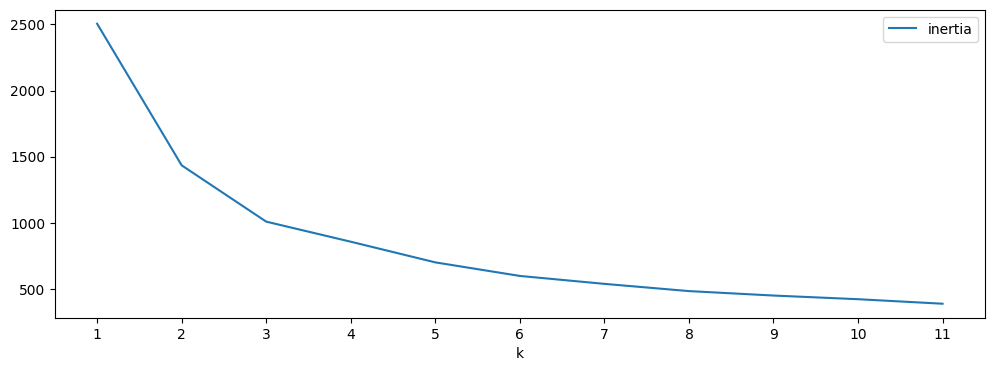

In [26]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot(kind="line",x="k",y="inertia",xticks=range(1,12),figsize=(12,4))

In [27]:
model = KMeans(n_clusters=3, random_state=1)
model.fit(persist_drop)
k_lower = model.predict(persist_drop)
print(k_lower)

[0 0 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 1 0 2 2 2 0 0 2 2 2 0 1 0 2 1
 2 0 2 2 2 2 2 0 1 1 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2
 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
persist_predictions = persist_drop.copy()
persist_predictions['clusters_lower'] = k_lower
persist_predictions.head()

,Class of 2019 Graduates,Class of 2019 Enrollments,Class of 2019 Enrollment Pct,Class of 2019 # of Enrollments Persisting,Class of 2019 Persistence Pct,Class of 2018 Graduates,Class of 2018 Enrollments,Class of 2018 Enrollment Pct,Class of 2018 # of Enrollments Persisting,Class of 2018 Persistence Pct,...,SY 2019 Total Number of Freshmen,SY 2018 On-Track Rate,SY 2018 Total Number of Freshmen,SY 2017 On-Track Rate,SY 2017 Total Number of Freshmen,SY 2016 On-Track Rate,SY 2016 Total Number of Freshmen,SY 2015 On-Track Rate,SY 2015 Total Number of Freshmen,clusters_lower
School Name,,,,,,,,,,,,,,,,,,,,,
CHICAGO VOCATIONAL HS,0.123452,-0.238491,-0.854935,-0.493228,-1.291768,0.149104,-0.403122,-1.489661,-0.534598,-1.015735,...,0.197098,0.058597,-0.066286,0.240097,-0.231951,0.542789,0.007227,0.094593,0.065186,0
DUNBAR HS,-0.634459,-0.556368,0.298048,-0.598213,-0.582159,-0.547932,-0.574233,-0.395416,-0.632801,-1.072999,...,-0.808408,-0.839981,-0.682563,-0.985355,-0.639973,-1.055829,-0.411369,-1.921473,-0.246259,0
JONES HS,1.559816,1.827705,1.293311,2.010261,1.733406,1.737843,1.977547,1.220700,2.231466,1.815674,...,1.461600,1.370035,1.197082,1.259500,1.179127,1.230680,1.116234,1.314843,1.371073,2
PROSSER HS,0.722446,0.585097,0.357872,0.241667,-0.065514,0.670311,0.668179,0.665160,0.578375,0.804002,...,0.273273,0.495743,0.914622,0.901624,0.793772,0.804382,0.724820,0.218387,0.688078,2
PAYTON HS,0.202910,0.491179,1.565241,0.653532,1.795652,0.205620,0.504508,1.546168,0.709313,1.847487,...,0.451014,1.272891,0.601348,1.281189,0.448087,1.279123,0.034409,1.129153,-0.011309,2


<Axes: xlabel='SY 2015 Total Number of Freshmen', ylabel='Class of 2019 Persistence Pct'>

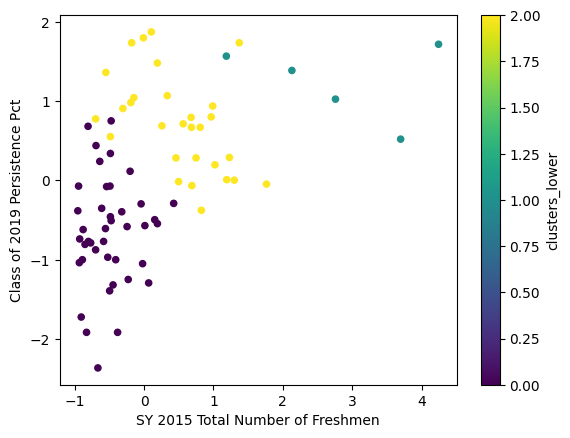

In [29]:
persist_predictions.plot.scatter(x="SY 2015 Total Number of Freshmen",
                                 y="Class of 2019 Persistence Pct",
                                 c="clusters_lower",
                                 colormap='viridis')

In [73]:
persist_predictions['SY 2015 Total Number of Freshmen'].sort_values().tail(10)

School Name
YOUNG HS           1.185298
JUAREZ HS          1.190762
KELLY HS           1.229010
HUBBARD HS         1.300042
JONES HS           1.371073
SCHURZ HS          1.764478
LINCOLN PARK HS    2.130564
TAFT HS            2.758919
CURIE HS           3.698721
LANE TECH HS       4.245117
Name: SY 2015 Total Number of Freshmen, dtype: float64

In [72]:
persist_predictions['Class of 2019 Persistence Pct'].sort_values().tail(10)

School Name
WESTINGHOUSE HS           1.067370
SOUTH SHORE INTL HS       1.359927
LINCOLN PARK HS           1.384826
LINDBLOM HS               1.478196
YOUNG HS                  1.565340
LANE TECH HS              1.714732
JONES HS                  1.733406
CHICAGO AGRICULTURE HS    1.733406
PAYTON HS                 1.795652
NORTHSIDE PREP HS         1.870348
Name: Class of 2019 Persistence Pct, dtype: float64

In [32]:
pca = PCA(n_components=3)
persist_pca = pca.fit_transform(persist_drop)
persist_pca[:5]

array([[-2.53829387,  1.66007604,  2.58290548],
       [-3.41696652,  2.04568691, -0.40911862],
       [ 7.48547542, -2.9828409 ,  0.12450641],
       [ 3.02971046, -0.23291253,  0.1855165 ],
       [ 3.79575849, -4.62383049, -0.84525385]])

In [33]:
pca.explained_variance_ratio_

array([0.68906714, 0.1574537 , 0.05152531])

In [34]:
pca.explained_variance_ratio_.sum()

0.8980461428307921

In [35]:
print(abs( pca.components_ ))

[[0.20394595 0.2089806  0.09890175 0.20603803 0.14594118 0.20263835
  0.2098107  0.11169254 0.21039657 0.15799552 0.20154156 0.2103069
  0.10437309 0.21110501 0.14313259 0.19041266 0.20548102 0.11664908
  0.20664481 0.13040729 0.18988626 0.20028132 0.11974398 0.20043709
  0.13945877 0.0381387  0.20215498 0.05778278 0.20269059 0.05383213
  0.20294829 0.05082652 0.19720751 0.05223309 0.19147198]
 [0.09072158 0.04253736 0.18367202 0.01233634 0.20886955 0.11374334
  0.05977655 0.20496064 0.02560923 0.22116048 0.12036395 0.06170851
  0.20923206 0.02537785 0.1909608  0.14041517 0.05799082 0.22494272
  0.02625981 0.18144125 0.1514624  0.07361042 0.20952638 0.04344892
  0.15278533 0.25452053 0.1034717  0.29087429 0.09478919 0.302114
  0.10095399 0.30307792 0.12601881 0.30957759 0.16209392]
 [0.09311328 0.07988881 0.15276219 0.07341716 0.20744266 0.04676261
  0.02451729 0.2283806  0.02536247 0.19036122 0.03920825 0.03429854
  0.17446018 0.03235368 0.21380588 0.02839233 0.01440869 0.19363819
  0

In [69]:
comps = []
for n in range(3):
  primaries = []
  for i in range(len(abs( pca.components_ )[n])):
    if abs( pca.components_ )[n][i] > 0.25:
      primaries.append(i)
  comps.append(primaries)
print('---------')
for comp in comps:
  for i in comp:
    print(persist_drop.columns[i])
  print('---------')

---------
---------
SY 2019 On-Track Rate
SY 2018 On-Track Rate
SY 2017 On-Track Rate
SY 2016 On-Track Rate
SY 2015 On-Track Rate
---------
SY 2019 On-Track Rate
SY 2018 On-Track Rate
SY 2017 On-Track Rate
SY 2016 On-Track Rate
SY 2015 On-Track Rate
---------


In [50]:
persist_drop.columns

Index(['Class of 2019 Graduates', 'Class of 2019 Enrollments',
       'Class of 2019 Enrollment Pct',
       'Class of 2019 # of Enrollments Persisting',
       'Class of 2019 Persistence Pct', 'Class of 2018 Graduates',
       'Class of 2018 Enrollments', 'Class of 2018 Enrollment Pct',
       'Class of 2018 # of Enrollments Persisting',
       'Class of 2018 Persistence Pct', 'Class of 2017 Graduates',
       'Class of 2017 Enrollments', 'Class of 2017 Enrollment Pct',
       'Class of 2017 # of Enrollments Persisting',
       'Class of 2017 Persistence Pct', 'Class of 2016 Graduates',
       'Class of 2016 Enrollments', 'Class of 2016 Enrollment Pct',
       'Class of 2016 # of Enrollments Persisting',
       'Class of 2016 Persistence Pct', 'Class of 2015 Graduates',
       'Class of 2015 Enrollments', 'Class of 2015 Enrollment Pct',
       'Class of 2015 # of Enrollments Persisting',
       'Class of 2015 Persistence Pct', 'SY 2019 On-Track Rate',
       'SY 2019 Total Number of F

In [58]:
for comp in comps:
  for i in comp:
    print(persist_drop.columns[i])
  print('---------')

---------
SY 2019 On-Track Rate
SY 2018 On-Track Rate
SY 2017 On-Track Rate
SY 2016 On-Track Rate
SY 2015 On-Track Rate
---------
SY 2019 On-Track Rate
SY 2018 On-Track Rate
SY 2017 On-Track Rate
SY 2016 On-Track Rate
SY 2015 On-Track Rate
---------


In [59]:
pca_df = pd.DataFrame(persist_pca,columns=['PC1','PC2','PC3'])
pca_df = pca_df.rename(index=index_dict)
pca_df.index.name = 'School_Name'
pca_df.head()

,PC1,PC2,PC3
School_Name,,,
CHICAGO VOCATIONAL HS,-2.538294,1.660076,2.582905
DUNBAR HS,-3.416967,2.045687,-0.409119
JONES HS,7.485475,-2.982841,0.124506
PROSSER HS,3.029710,-0.232913,0.185516
PAYTON HS,3.795758,-4.623830,-0.845254


In [61]:
model_pca = KMeans(n_clusters=3,random_state=1)
model_pca.fit(pca_df)
k_4 = model_pca.predict(pca_df)
print(k_4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 1 0 2 2 2 0 0 2 2 2 0 1 0 2 1
 2 0 2 2 2 2 2 0 1 1 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2
 2]


In [62]:
df_pca_predictions = pca_df.copy()
df_pca_predictions['predicted_clusters'] = k_4
df_pca_predictions.head()

,PC1,PC2,PC3,predicted_clusters
School_Name,,,,
CHICAGO VOCATIONAL HS,-2.538294,1.660076,2.582905,0
DUNBAR HS,-3.416967,2.045687,-0.409119,0
JONES HS,7.485475,-2.982841,0.124506,2
PROSSER HS,3.029710,-0.232913,0.185516,2
PAYTON HS,3.795758,-4.623830,-0.845254,2


<Axes: xlabel='PC1', ylabel='PC2'>

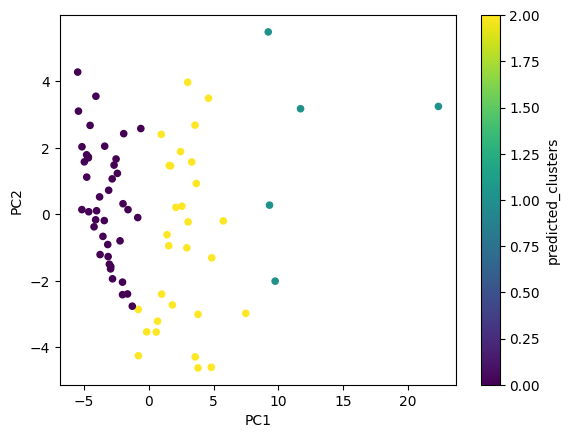

In [67]:
df_pca_predictions.plot.scatter(x="PC1",
                                 y="PC2",
                                 c="predicted_clusters",
                                 colormap='viridis')

In [70]:
merge_df = df_pca_predictions.copy()

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
# Split the data into training and testing sets
X = merge_df.drop('High School Graduation Rate', axis=1)
y = merge_df['High School Graduation Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Scale the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)